In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
num_obs = 50012

In [56]:
## Generate the true probabilities
probvec = np.round(np.random.uniform(0,1,num_obs),decimals=4)
probvec

array([ 0.0748,  0.3168,  0.1169, ...,  0.7943,  0.0988,  0.5526])

In [57]:
## Generate a single 0-1 Bernoulli outcome for each true probability
resultvec = np.random.binomial(1,p=probvec,size=num_obs)
resultvec

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
## Come up with a complicated (yet monotonic) function to create a score
scorevec = np.round((((probvec+2)*7)+2)**3,decimals=2)
scorevec = np.sign(scorevec-6000)*(np.abs(scorevec-6000))**(1/3) + 3

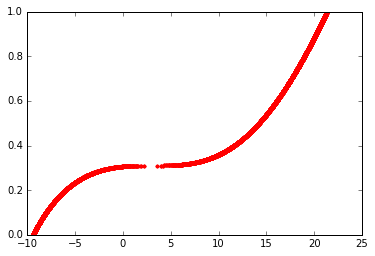

In [59]:
## Plot the function
plt.plot(scorevec, probvec, 'r.')

In [60]:
## The goal is to recover something close to the above function, based solely on scorevec and resultvec

min_bin_size = 224.0


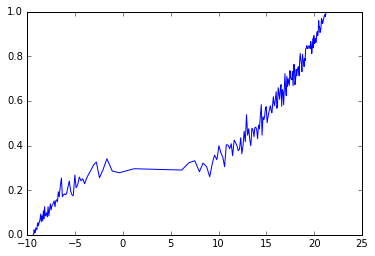

In [61]:
# def calibrate_scores(scorevec, resultvec)

## do a bunch of input checking
veclen = len(scorevec)
min_bin_size = np.round((veclen)**(1/2))
print("min_bin_size = {}".format(min_bin_size))
#sort by scorevec, "carrying along" the resultvec
sorted_mat = np.hstack((scorevec,resultvec)).reshape(2,-1).T
idx = np.argsort(sorted_mat[:,0])
sorted_mat=sorted_mat[idx,:]
sorted_mat

## Create intervals
#fractional_bin_index_length = veclen/binsize
num_bins = np.floor(veclen/min_bin_size).astype(int)
bin_left_indices = (np.floor(np.array(range(0,int(num_bins))) *(veclen/min_bin_size))).astype(int)
bin_right_indices = np.copy(bin_left_indices)
bin_right_indices[0:(num_bins-1)] = bin_left_indices[1:num_bins]
bin_right_indices[num_bins-1]=veclen
#bin_right_indices
#bin_left_indices
#xvec = np.zeros(num_bins)
#yvec = np.zeros(num_bins)
xvec = [np.median(sorted_mat[bin_left_indices[i]:bin_right_indices[i],0]) for i in range(num_bins)]
yvec = [np.mean(sorted_mat[bin_left_indices[i]:bin_right_indices[i],1]) for i in range(num_bins)]

## Initialize empty vectors
## Get bin representative value and mean of resultvec
## export x,y points
plt.plot(xvec, yvec)

In [62]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
z = lowess(yvec, xvec)
w = lowess(resultvec, scorevec)



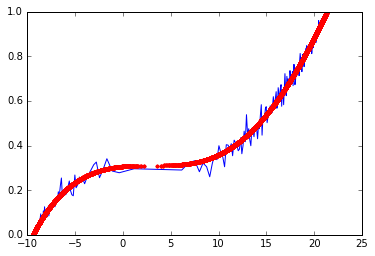

In [63]:
plt.plot(xvec, yvec)
plt.plot(scorevec, probvec, 'r.')
#plt.plot(z[:,0],z[:,1], 'c')
#plt.plot(w[:,0],w[:,1], 'g')



In [64]:
np.median([5,2,7])

5.0

In [65]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
z = lowess(yvec, xvec)
#w = lowess(yvec, xvec, frac=1./3)


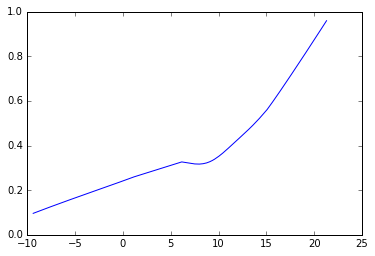

In [66]:
plt.plot(z[:,0],z[:,1])
